##  Reading and Understanding the Data

In [777]:
import numpy as np
import pandas as pd

In [778]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [779]:
car_info = pd.read_csv('CarPrice_Assignment.csv') # Importing the csv file data into DataFrame name car_info using pandas

In [780]:
car_info.shape #Shape of the car_info (205 Rows, 26 Columns)

(205, 26)

In [781]:
car_info.head(3) # see what kind of data we are having

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [782]:
car_info.info()
#checking for datacolumns
# there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [783]:
# Extracting Car_company_name from car name
car_info['car_company'] = car_info.CarName.apply(lambda x : x.split('-')[0])
car_info['car_company'] = car_info.car_company.apply(lambda x : x.split(' ')[0])

### Visualizing price with other numerical values using scatter plot

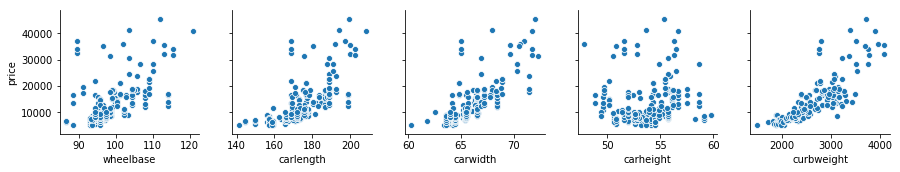

In [784]:
sns.pairplot(car_info, x_vars=["wheelbase", "carlength", "carwidth","carheight","curbweight"], y_vars=["price"])
# sns.pairplot(car_info) x_vars=["sepal_width", "sepal_length"],
#plt.show()

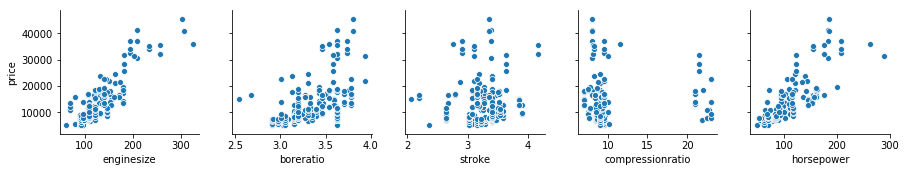

In [785]:
sns.pairplot(car_info, x_vars=["enginesize","boreratio","stroke","compressionratio","horsepower"], y_vars=["price"])
plt.show()

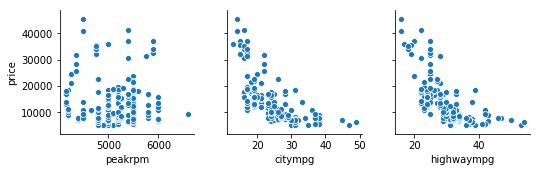

In [786]:
sns.pairplot(car_info, x_vars=["peakrpm","citympg","highwaympg"], y_vars=["price"])
plt.show()

### from the above graph we can see that there could be co relation between price and any of the attrib
### horsepower, enginesize, carlenght,carwidth, curbweight

In [787]:
car_info.car_company.unique()  # fetching out unique car company to remove redundency

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [788]:
#    Removing out the redundant name
def correct_name(x):
    return x.map({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche',
                      'toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen',
                     'maxda':'mazda','Nissan':'nissan','porcshce':'porsche',
                      'toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen',
                     'alfa':'alfa','audi':'audi','bmw':'bmw',
                      'chevrolet':'chevrolet','dodge':'dodge','honda':'honda',
                     'isuzu':'isuzu','jaguar':'jaguar','mazda':'mazda',
                      'buick':'buick','mercury':'mercury','mitsubishi':'mitsubishi',
                     'nissan':'nissan','peugeot':'peugeot','plymouth':'plymouth',
                      'porsche':'porsche','renault':'renault','saab':'saab',
                     'subaru':'subaru','toyota':'toyota','volkswagen':'volkswagen',
                      'volvo':'volvo'})

varlist =  ['car_company']
car_info[varlist] = car_info[varlist].apply(correct_name)                                            

In [789]:
car_info.car_company.unique() # now the number of unique value chnages, to check if the redundant values has been removed or not

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

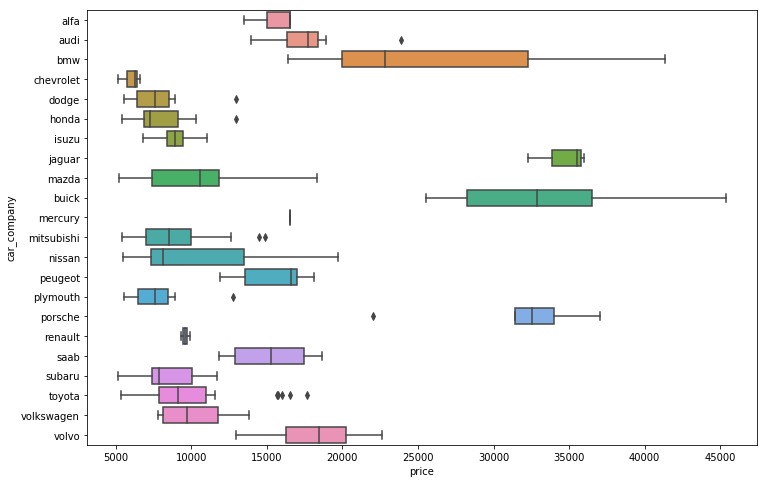

In [790]:
# Plotting Box plot with company name and their prices
plt.figure(figsize = (12, 8))
sns.boxplot(y = 'car_company', x = 'price', data = car_info)
plt.show()

### We can see from the above plot that Buick and jaguar are on higher price range

In [791]:
# Change the column with binary entries from the field value to 0 and 1
varlist =  ['fueltype', 'aspiration', 'doornumber', 'enginelocation']
car_info[varlist] = car_info[varlist].apply(lambda x: x.map({'gas':1,'diesel':0,'std':1,'turbo':0,'two':1,'four':0,'front':1,'rear':0}))

### Dummies variable and table

In [792]:
status1 = pd.get_dummies(car_info['carbody'])
status1.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [793]:
status2 = pd.get_dummies(car_info['drivewheel'])
status2.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [794]:
status3 = pd.get_dummies(car_info['enginetype'])
status3.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [795]:
status4 = pd.get_dummies(car_info['cylindernumber'])
status4.head()

,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [796]:
status5 = pd.get_dummies(car_info['fuelsystem'])
status5.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [797]:
status6 = pd.get_dummies(car_info['car_company'])
status6.head()

,alfa,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### In the above each dummy table we can remove 1 extra variable, but here i chooses not drop
### Below is code to add dummy variable to dataframe

In [798]:
car_info = pd.concat([car_info, status1], axis = 1)
car_info = pd.concat([car_info, status2], axis = 1)
car_info = pd.concat([car_info, status3], axis = 1)
car_info = pd.concat([car_info, status4], axis = 1)
car_info = pd.concat([car_info, status5], axis = 1)
car_info = pd.concat([car_info, status6], axis = 1)

In [799]:
car_info.drop(['carbody','drivewheel','enginetype','cylindernumber','fuelsystem','car_company','CarName'], axis = 1, inplace = True)
# droping off the extra column
# We have extracted the car_company from carname and later that too converted into dummy variable for anlysis

In [800]:
car_info.drop(['car_ID'], axis = 1, inplace = True)
# We also droped the car_ID column as there could not any analysis on this(its just a serial number)

In [801]:
# in the above dataframe description of car_info we can check that datatype of numeric was not numeric 
# therefore we convert it into numeric
car_info[['fueltype', 'aspiration','doornumber','enginelocation']] = car_info[['fueltype', 'aspiration','doornumber','enginelocation']].apply(pd.to_numeric) 

In [802]:
car_info.info()
# checking if all the columns datatype are in their required form or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 71 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
convertible         205 non-null uint8
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               2

## Model Building

In [803]:
from sklearn.model_selection import train_test_split
#library to perform train test on model

In [804]:
np.random.seed(0)
# Data spliting into train and test
df_train, df_test = train_test_split(car_info, train_size = 0.7, test_size = 0.3, random_state = 100)
# dividing the dataset into 70% and 30%

### Scaling

In [805]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # We are using minmax scaler

In [806]:
# Rescale model for all the numeric value attribute
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,1,1,1,0,1,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,1,0,0,0,0,0,0,0
125,3,1,1,1,1,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,1,0,0,0,0,0,0
166,1,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,0,0,0
199,-1,1,0,0,1,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,0,0,1


In [807]:
y_train = df_train.pop('price')
X_train = df_train

In [808]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [809]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [810]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # list the variable ranking wise

[('symboling', False, 60),
 ('fueltype', False, 18),
 ('aspiration', False, 11),
 ('doornumber', False, 52),
 ('enginelocation', True, 1),
 ('wheelbase', False, 7),
 ('carlength', False, 37),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 19),
 ('horsepower', False, 33),
 ('peakrpm', False, 10),
 ('citympg', False, 38),
 ('highwaympg', False, 9),
 ('convertible', False, 8),
 ('hardtop', False, 45),
 ('hatchback', False, 44),
 ('sedan', False, 47),
 ('wagon', False, 55),
 ('4wd', False, 57),
 ('fwd', False, 56),
 ('rwd', False, 46),
 ('dohc', False, 27),
 ('dohcv', False, 42),
 ('l', False, 41),
 ('ohc', False, 30),
 ('ohcf', False, 36),
 ('ohcv', False, 26),
 ('rotor', True, 1),
 ('eight', False, 4),
 ('five', False, 29),
 ('four', False, 21),
 ('six', False, 3),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 5),
 ('1bbl', False, 16),
 ('2bbl'

In [811]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'rotor', 'three', 'twelve', 'bmw', 'porsche'],
      dtype='object')

In [812]:
X_train_rfe = X_train[col]

In [813]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [814]:
lm = sm.OLS(y_train,X_train_rfe).fit()  #fitting the mode

In [815]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.21e-64
Time:                        23:33:46   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1704      0.084      2.

In [816]:
# R- squred value of this model look overfitted and the p value if twelve looks high, therefore we will drop it
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

In [817]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [818]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [819]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.18e-65
Time:                        23:33:47   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1760      0.084      2.

In [820]:
# try by removing three column
X_train_new = X_train_new.drop(["three"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.55e-65
Time:                        23:33:47   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1755      0.085      2.

In [821]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     175.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.32e-64
Time:                        23:33:47   Log-Likelihood:                 182.43
No. Observations:                 143   AIC:                            -348.9
Df Residuals:                     135   BIC:                            -325.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1545      0.088      1.

In [822]:
# R Squared value is still high 

In [823]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

In [824]:
# Check for the VIF value

X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,226.99
3,curbweight,7.94
4,enginesize,5.12
2,carwidth,4.79
7,porsche,1.67
1,enginelocation,1.65
5,rotor,1.17
6,bmw,1.09


In [825]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [826]:
# Check for the VIF value after dropping the const 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,37.62
1,carwidth,34.08
3,enginesize,17.36
0,enginelocation,8.04
4,rotor,1.20
6,porsche,1.18
5,bmw,1.14


In [827]:
X_train_new = X_train_new.drop(['curbweight'], axis=1)

In [828]:
# Check for the VIF value after dropping the const 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,19.69
2,enginesize,9.92
0,enginelocation,7.89
3,rotor,1.15
4,bmw,1.14
5,porsche,1.12


In [829]:
X_train_new = X_train_new.drop(['carwidth'], axis=1)

In [830]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,3.94
0,enginelocation,3.68
3,bmw,1.11
4,porsche,1.10
2,rotor,1.08


In [831]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   
print(lm.summary())

# P Fstatistic increases

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.68e-53
Time:                        23:33:49   Log-Likelihood:                 148.60
No. Observations:                 143   AIC:                            -285.2
Df Residuals:                     137   BIC:                            -267.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0454      0.108      0.

In [832]:
X_train_new = X_train_new.drop(["enginelocation"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   
print(lm.summary())

# P Fstatistic increases

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     180.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           7.97e-54
Time:                        23:33:50   Log-Likelihood:                 147.87
No. Observations:                 143   AIC:                            -285.7
Df Residuals:                     138   BIC:                            -270.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0825      0.014     -5.778      0.0

In [833]:
# This model looks good but still R squred value is not as expected

In [834]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train[['curbweight','enginesize','rotor','porsche']])

lm = sm.OLS(y_train,X_train_lm).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     183.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.61e-54
Time:                        23:33:51   Log-Likelihood:                 148.69
No. Observations:                 143   AIC:                            -287.4
Df Residuals:                     138   BIC:                            -272.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1319      0.016     -8.235      0.0

In [835]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['curbweight','enginesize','rotor','porsche','boreratio']])

lm = sm.OLS(y_train,X_train_lm).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.66e-54
Time:                        23:33:52   Log-Likelihood:                 150.85
No. Observations:                 143   AIC:                            -289.7
Df Residuals:                     137   BIC:                            -271.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1078      0.020     -5.467      0.0

In [836]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['curbweight','enginesize','rotor','porsche','boreratio','carwidth']])

lm = sm.OLS(y_train,X_train_lm).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     129.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.05e-53
Time:                        23:33:52   Log-Likelihood:                 153.08
No. Observations:                 143   AIC:                            -292.2
Df Residuals:                     136   BIC:                            -271.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1321      0.023     -5.811      0.0

In [837]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['curbweight','enginesize','rotor','porsche','boreratio','carwidth','enginelocation']])

lm = sm.OLS(y_train,X_train_lm).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.22e-54
Time:                        23:33:53   Log-Likelihood:                 156.68
No. Observations:                 143   AIC:                            -297.4
Df Residuals:                     135   BIC:                            -273.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1395      0.105      1.

In [838]:
## Residual Data analysis

In [839]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

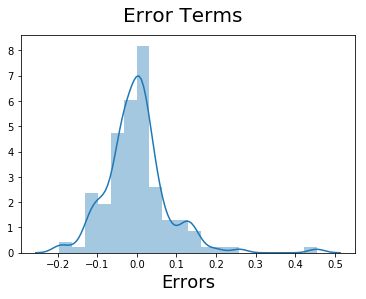

In [840]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Make Prediction

In [842]:
num_vars2 = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars2] = scaler.transform(df_test[num_vars2])

In [846]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 71 columns):
symboling           62 non-null int64
fueltype            62 non-null int64
aspiration          62 non-null int64
doornumber          62 non-null int64
enginelocation      62 non-null int64
wheelbase           62 non-null float64
carlength           62 non-null float64
carwidth            62 non-null float64
carheight           62 non-null float64
curbweight          62 non-null float64
enginesize          62 non-null float64
boreratio           62 non-null float64
stroke              62 non-null float64
compressionratio    62 non-null float64
horsepower          62 non-null float64
peakrpm             62 non-null float64
citympg             62 non-null float64
highwaympg          62 non-null float64
price               62 non-null float64
convertible         62 non-null uint8
hardtop             62 non-null uint8
hatchback           62 non-null uint8
sedan               62 non-nul

In [763]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.919355,0.887097,0.822581,0.435484,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,1.358620,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [847]:
y_test = df_test.pop('price')
X_test = df_test

In [848]:
X_test_new = X_test[X_train_lm.columns]
X_test_new = sm.add_constant(X_test_new)

KeyError: "['const'] not in index"

In [765]:
lm = LinearRegression()
lm.fit(X_test, y_test)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [770]:
# R Square for Test Set
X_test_lm = sm.add_constant(X_test[['curbweight','enginesize','rotor','porsche','boreratio','carwidth','enginelocation']])

lm = sm.OLS(y_test,X_test_lm).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     83.62
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.05e-24
Time:                        23:01:56   Log-Likelihood:                 69.044
No. Observations:                  62   AIC:                            -126.1
Df Residuals:                      56   BIC:                            -113.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0284      0.031      0.

In [849]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

KeyError: "['const'] not in index"

In [767]:
# Making predictions
y_pred = lm.predict(X_test_new)

ValueError: shapes (62,5) and (70,) not aligned: 5 (dim 1) != 70 (dim 0)

Text(0, 0.5, 'y_pred')

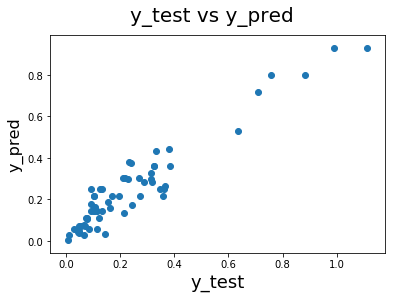

In [768]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [769]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9004517106020887